In [1]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python" 

import tensorflow as tf
from tensorboard import program

log_dir = "D:\Cursos\REPOSITORIOS\DATASET\malware_total\logs"
tb=program.TensorBoard()
tb.configure(argv=[None, '--logdir', log_dir])
url = tb.launch() #  lanza TensorBoard en el navegador

# Configurar la GPU antes de inicializar TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)

# Configurar la GPU para sea mas eficiente en el uso de memoria tensorflow
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

IndexError: list index out of range

In [4]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
#TENSORFLOW SIN GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Esto fuerza a TensorFlow a usar la CPU

import tensorflow as tf

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import funciones_ML as bt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay,confusion_matrix, accuracy_score,recall_score,roc_auc_score  
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import parallel_backend
import category_encoders as ce
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2, l1, l1_l2
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras import regularizers
from sklearn.compose import ColumnTransformer
from tensorflow.keras.losses import CategoricalCrossentropy, sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau





# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [19]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_origen.csv")

In [20]:
#Elimino la columna ts ya que tengo el time dividido en otras columnas
df.drop(columns={"ts"}, inplace=True)

In [21]:
df

,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,Target,anyo,mes,dia,hora
0,51524.0,65.127.233.163,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,Malicious,2018,5,9,15
1,56305.0,63.150.16.171,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15
2,41101.0,111.40.23.49,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15
3,60905.0,131.174.215.147,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,Malicious,2018,5,9,15
4,44301.0,91.42.47.63,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,Malicious,2018,5,9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,123.0,89.221.210.188,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,Benign,2019,9,21,0
25010999,37306.0,102.165.48.81,17769.0,tcp,S1,0.0,ShAdDaT,8952.0,483602.0,9613.0,520116.0,Malicious,2019,9,20,1
25011000,123.0,212.111.30.190,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,Benign,2019,9,21,0
25011001,123.0,5.1.56.123,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,Benign,2019,9,21,0


In [22]:
df.Target.value_counts()/df.shape[0]*100

Malicious    64.894818
Benign       35.105182
Name: Target, dtype: float64

In [23]:
cat= ['proto','conn_state','id.resp_h',"history"]
num=[  'missed_bytes', 'id.orig_p','id.resp_p','orig_pkts', 'orig_ip_bytes','resp_pkts', 'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora']
target='Target'


## ESTUIDO CORRELACIONAL DEL DATASET

In [9]:
correlacion=np.abs(df[num].corr())

In [25]:
correlacion

,missed_bytes,id.orig_p,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,anyo,mes,dia,hora
missed_bytes,1.000000e+00,0.000190,0.000087,6.355651e-08,2.425040e-07,0.000671,0.000409,0.000124,0.000198,0.000023,9.750739e-07
id.orig_p,1.904359e-04,1.000000,0.170480,3.206039e-04,2.708594e-04,0.000907,0.001756,0.011032,0.030245,0.122964,6.501087e-02
id.resp_p,8.736641e-05,0.170480,1.000000,2.035521e-04,1.475625e-04,0.001272,0.001727,0.624627,0.006973,0.136001,4.563018e-01
orig_pkts,6.355651e-08,0.000321,0.000204,1.000000e+00,8.057485e-01,0.000215,0.000120,0.000958,0.000091,0.000144,6.269441e-04
orig_ip_bytes,2.425040e-07,0.000271,0.000148,8.057485e-01,1.000000e+00,0.000255,0.000149,0.001059,0.000161,0.000339,3.943269e-04
resp_pkts,6.710705e-04,0.000907,0.001272,2.153829e-04,2.549653e-04,1.000000,0.562942,0.001321,0.002767,0.004156,1.519776e-04
resp_ip_bytes,4.094239e-04,0.001756,0.001727,1.196478e-04,1.494836e-04,0.562942,1.000000,0.001298,0.003524,0.003031,1.213457e-04
anyo,1.243974e-04,0.011032,0.624627,9.577270e-04,1.058839e-03,0.001321,0.001298,1.000000,0.530378,0.296260,3.587630e-01
mes,1.979458e-04,0.030245,0.006973,9.096150e-05,1.607100e-04,0.002767,0.003524,0.530378,1.000000,0.154738,9.887303e-02
dia,2.301578e-05,0.122964,0.136001,1.444959e-04,3.394250e-04,0.004156,0.003031,0.296260,0.154738,1.000000,2.691382e-01


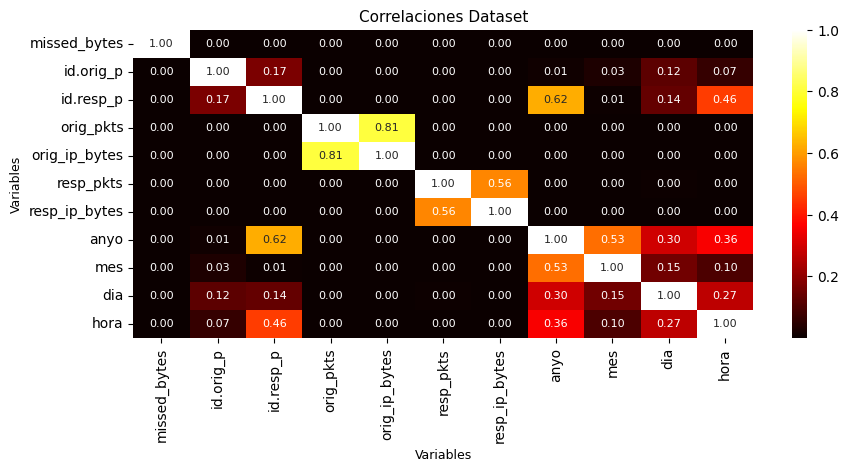

In [26]:
plt.figure(figsize=(10,4))
sns.heatmap(correlacion, annot=True,annot_kws={"fontsize": 8}, cmap="hot", fmt=".2f")
plt.title("Correlaciones Dataset",fontsize=11)
plt.xlabel("Variables",fontsize=9)
plt.ylabel("Variables",fontsize=9)
plt.show()

1. Se va a proceder a eliminar las variables siguientes:
    - DIA.- Presenta un valor de correlación de 0.27 igual que hora, quedandonos con este ultimo, debido a que es mas interesante conocer el intervalo horario de los ataques.
    - RESP_IP_BYTES y ORIG_IP_BYTES.- Tienen un valor de 0.56, idéntico a RESP_PKTS y ORIG_PKTS, siendo estas últimas más interesantes, ya que acumulan los paquetes de datos que pueden contener malware, y las que se eliminan sólo tiene los bytes enviados.
    - ID.ORIG_P.- por la misma razaon que la anterior, al tener el mismo valorque id.resp_p
    - MISSED_BYTES.- Al ser dificil de interpretar y carecer de relacion alguna con las variables.
    - No olvidemos las observadas en las graficasd: col=["ip.resp_p", "orig_ip_bytes"]
    

In [24]:
columns_correla_grafica_eliminar=["dia","mes","resp_ip_bytes","orig_ip_bytes","id.resp_p","missed_bytes"]

In [28]:
df.columns

Index(['id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'conn_state',
       'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora', 'Target'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id.orig_p      float64
 1   id.resp_h      object 
 2   id.resp_p      float64
 3   proto          object 
 4   conn_state     object 
 5   missed_bytes   float64
 6   history        object 
 7   orig_pkts      float64
 8   orig_ip_bytes  float64
 9   resp_pkts      float64
 10  resp_ip_bytes  float64
 11  anyo           int64  
 12  mes            int64  
 13  dia            int64  
 14  hora           int64  
 15  Target         int64  
dtypes: float64(7), int64(5), object(4)
memory usage: 3.0+ GB


In [47]:
df.columns

Index(['id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'conn_state',
       'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora', 'Target'],
      dtype='object')

## BUSQUEDA Y ELIMINACION DE OUTLIERS

In [25]:
df_ou=df.copy()

In [26]:
#itero por las columnas nuemricas sacando la media y la std de cada columna
for column in df_ou.select_dtypes(include=['float64', 'int64']):
    # Calcular la media y la desviación estándar
    mean = df_ou[column].mean()
    std = df_ou[column].std()
    
    #  crearemos una nueva columna con la terminacion _zscore, con el calculo del valor Z que es la resta del valor de cada columna menos la media total dividido entre la std media( si >3 o <3 lo consideramos outlayers)
    df_ou[column + '_zscore'] = (df_ou[column] - mean) / std


A.- GRAFICAMOS CADA COLUMNA ANTES DE LA ELIMINACION 

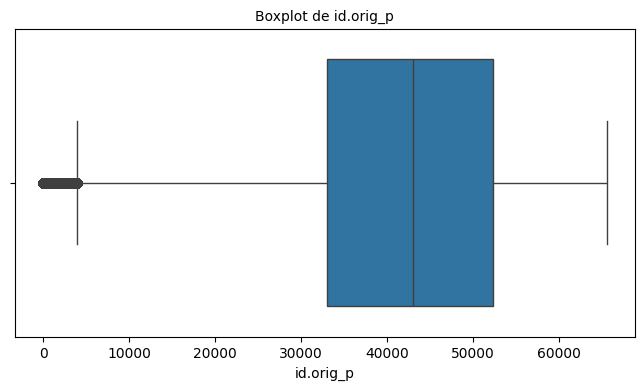

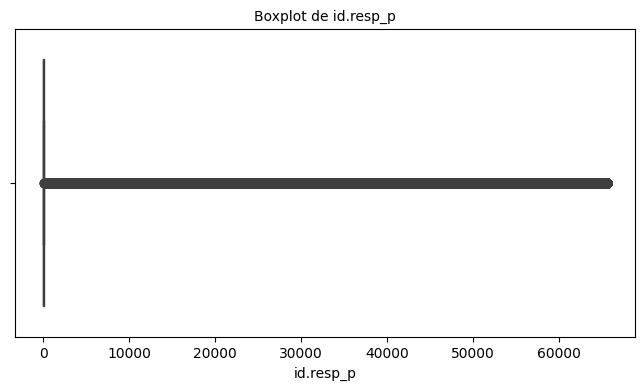

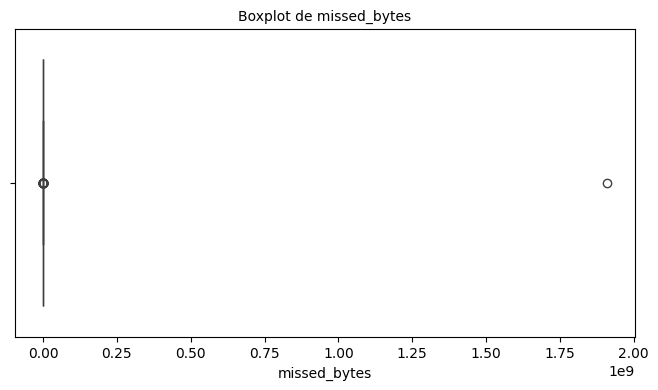

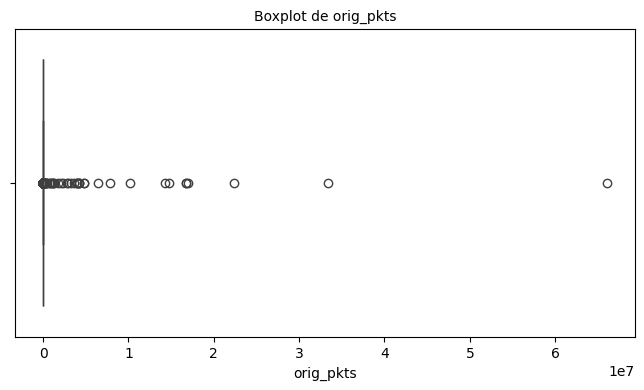

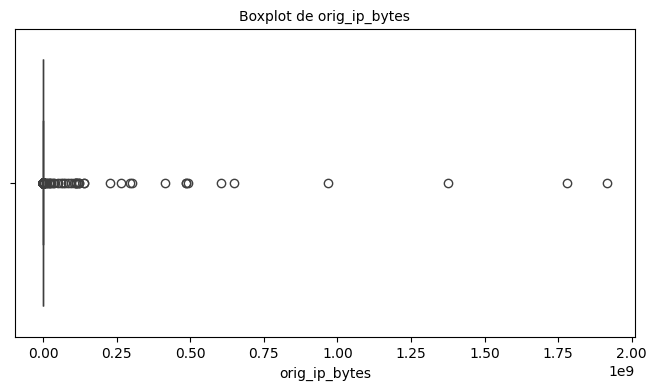

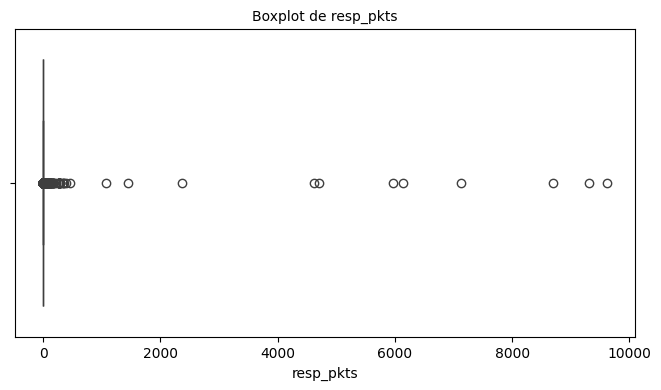

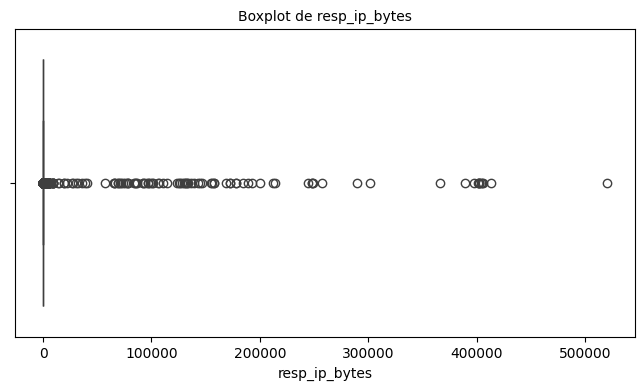

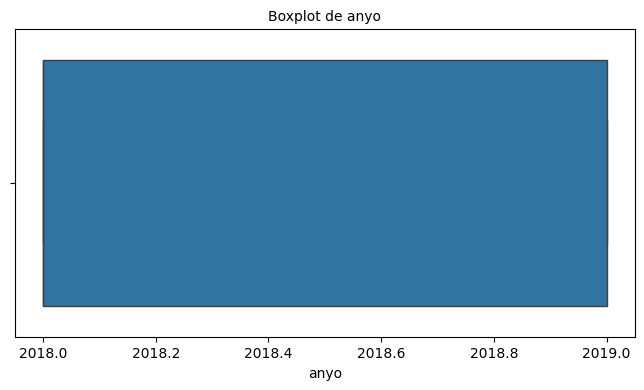

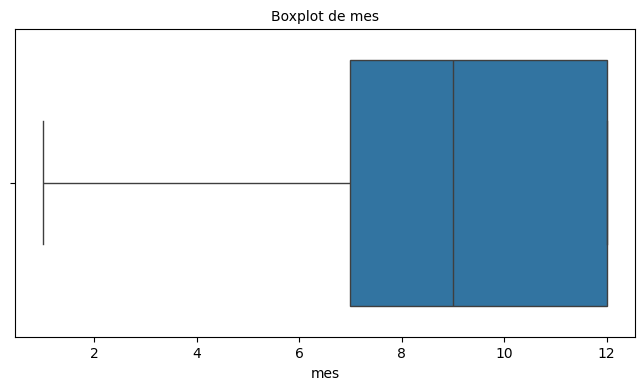

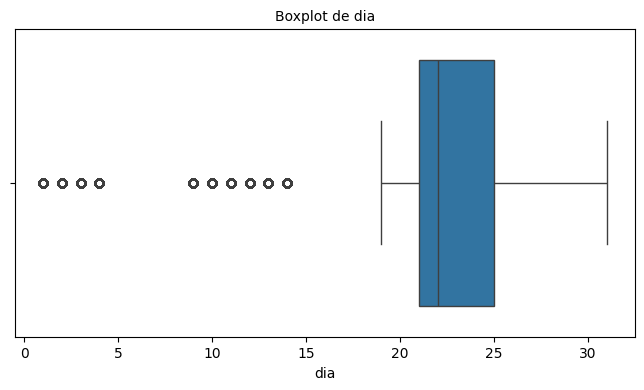

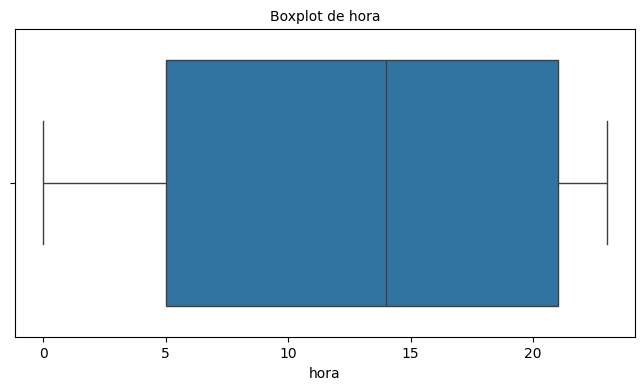

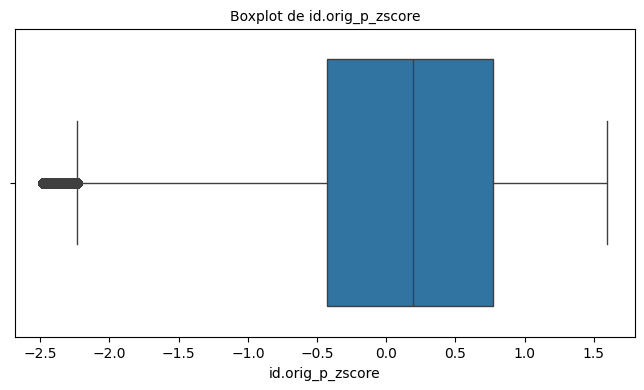

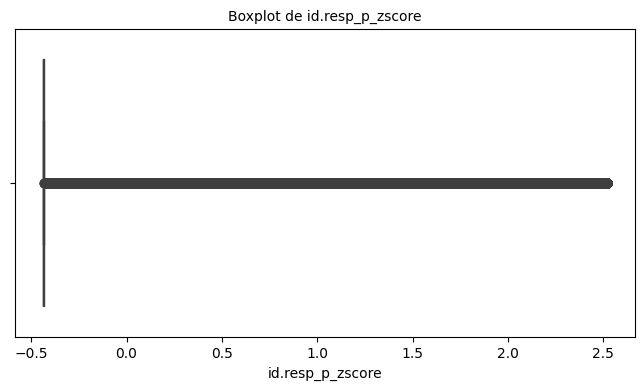

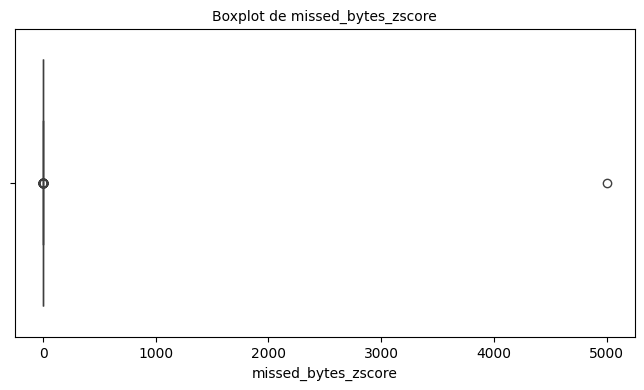

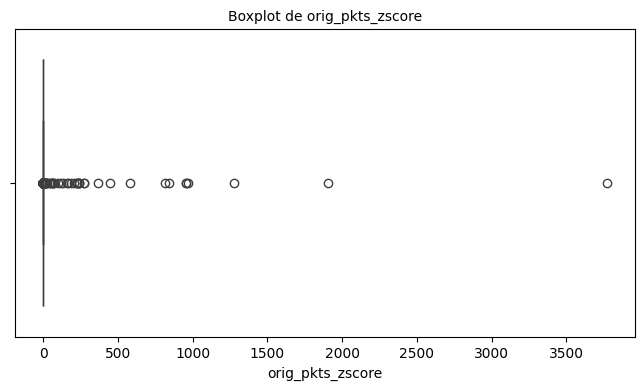

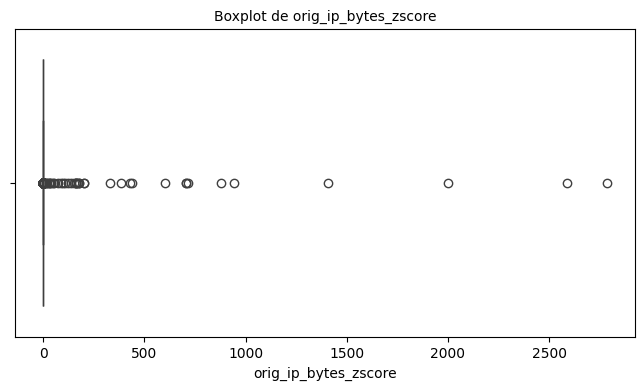

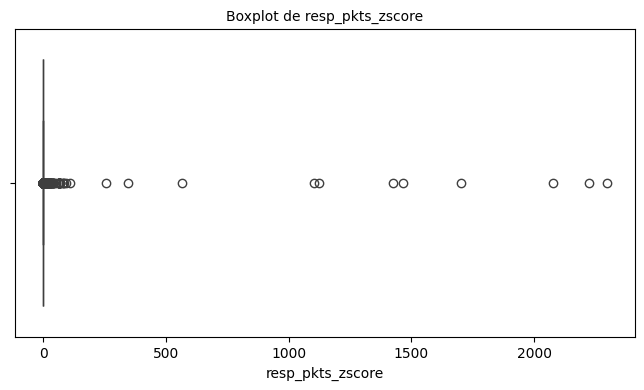

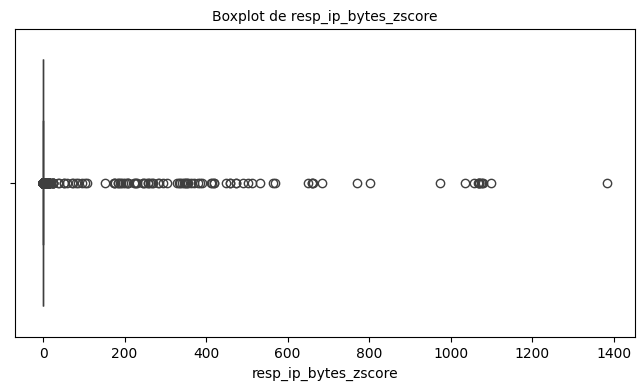

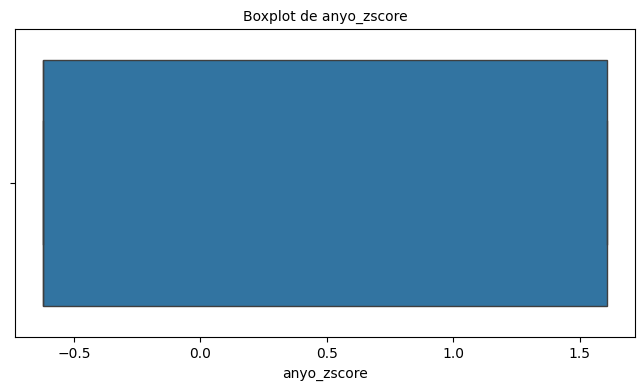

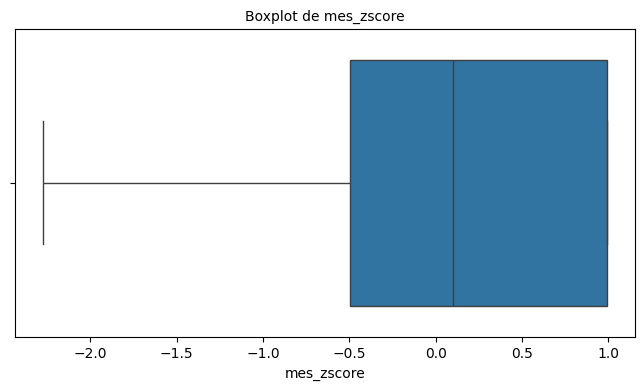

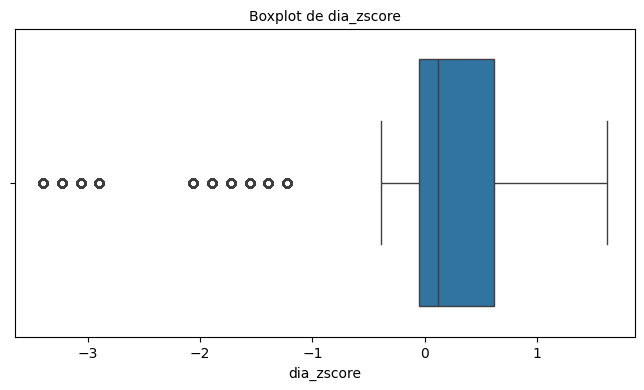

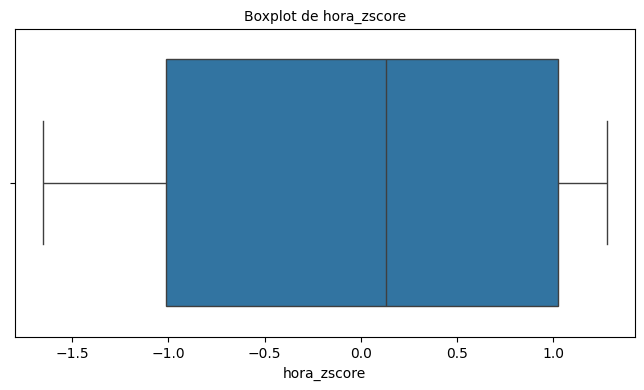

In [102]:

for col in df_ou.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_ou[col])
    plt.title('Boxplot de ' + col)
    plt.show()

b.- ELIMINAMOS LAS QUE YA HABIAMOS DECIDDO POR CORRELACION ANTERIORMENTE

In [27]:
eliminar=["dia","mes","resp_ip_bytes","orig_ip_bytes","id.resp_p","missed_bytes" ]

In [28]:
df_ou.drop(eliminar, axis=1, inplace=True)

In [29]:
df_ou

,id.orig_p,id.resp_h,proto,conn_state,history,orig_pkts,resp_pkts,Target,anyo,hora,id.orig_p_zscore,id.resp_p_zscore,missed_bytes_zscore,orig_pkts_zscore,orig_ip_bytes_zscore,resp_pkts_zscore,resp_ip_bytes_zscore,anyo_zscore,mes_zscore,dia_zscore,hora_zscore
0,51524.0,65.127.233.163,tcp,S0,S,3.0,0.0,Malicious,2018,15,0.721750,-0.436876,-0.0002,-0.000600,-0.000596,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651
1,56305.0,63.150.16.171,tcp,S0,S,1.0,0.0,Malicious,2018,15,1.018855,-0.436876,-0.0002,-0.000714,-0.000771,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651
2,41101.0,111.40.23.49,tcp,S0,S,1.0,0.0,Malicious,2018,15,0.074036,-0.436876,-0.0002,-0.000714,-0.000771,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651
3,60905.0,131.174.215.147,tcp,S0,S,3.0,0.0,Malicious,2018,15,1.304711,-0.436876,-0.0002,-0.000600,-0.000596,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651
4,44301.0,91.42.47.63,tcp,S0,S,1.0,0.0,Malicious,2018,15,0.272892,-0.436876,-0.0002,-0.000714,-0.000771,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,123.0,89.221.210.188,udp,SF,Dd,2.0,2.0,Benign,2019,0,-2.472452,-0.432367,-0.0002,-0.000657,-0.000637,0.473902,0.399383,1.607241,0.099767,-0.052050,-1.651480
25010999,37306.0,102.165.48.81,tcp,S1,ShAdDaT,8952.0,9613.0,Malicious,2019,1,-0.161796,0.363413,-0.0002,0.510430,0.702246,2294.616288,1382.563794,1.607241,0.099767,-0.219342,-1.524071
25011000,123.0,212.111.30.190,udp,SF,Dd,2.0,2.0,Benign,2019,0,-2.472452,-0.432367,-0.0002,-0.000657,-0.000637,0.473902,0.399383,1.607241,0.099767,-0.052050,-1.651480
25011001,123.0,5.1.56.123,udp,SF,Dd,2.0,2.0,Benign,2019,0,-2.472452,-0.432367,-0.0002,-0.000657,-0.000637,0.473902,0.399383,1.607241,0.099767,-0.052050,-1.651480


In [30]:
df_ou.shape

(25011003, 21)

C.- ELIMINAMOS TODAS LAS COLUMNAS QUE ESTE FUERA DEL RANGO INTERQUARTILICO +-1.5 *IQR Y ESTANDARIZAMOS EL RESTO. DESPUES GRAFICAMOS DE NUEVO

In [31]:
for col in df_ou.select_dtypes(include=['float64', 'int64']):
    # Calcular el IQR
    Q1 = df_ou[col].quantile(0.25)
    Q3 = df_ou[col].quantile(0.75)
    IQR = Q3 - Q1

    # límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Eliminar los outliers
    df_ou = df_ou[(df_ou[col] >= lower_bound) & (df_ou[col] <= upper_bound)].reset_index(drop=True)

In [32]:
df_ou.shape

(15181640, 21)

despues de la eliminacion de la outilers tenemos un 38.75% menos de informacion

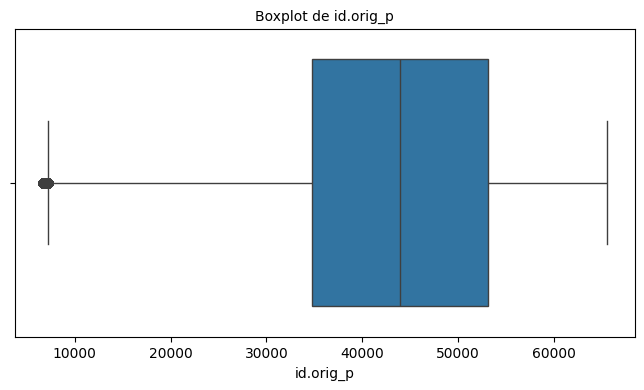

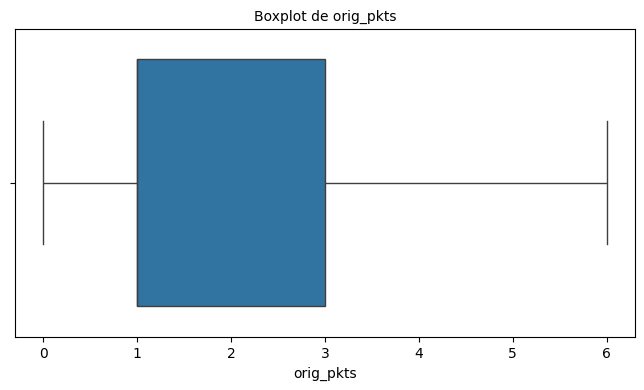

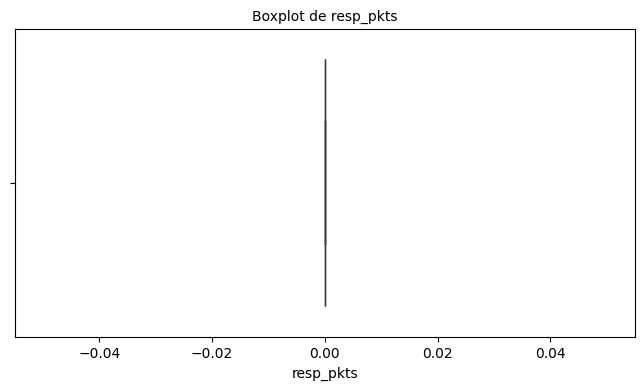

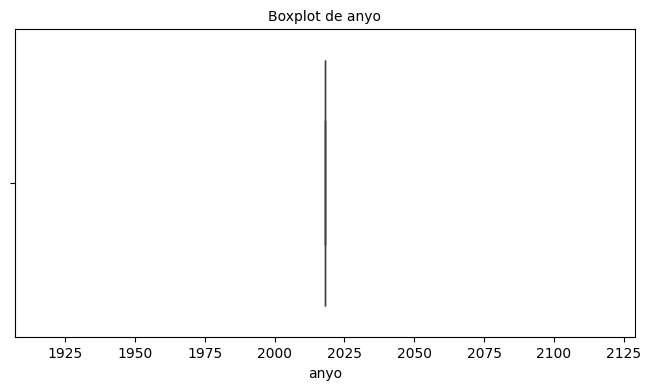

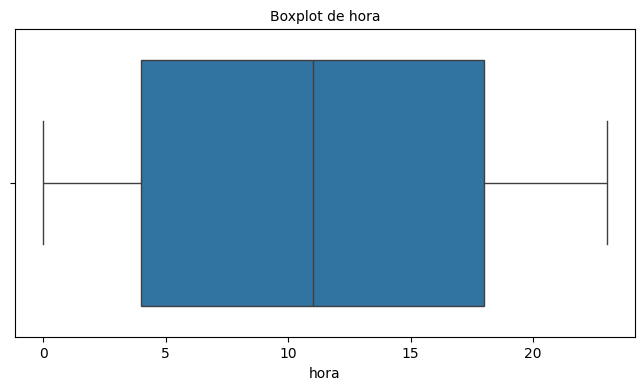

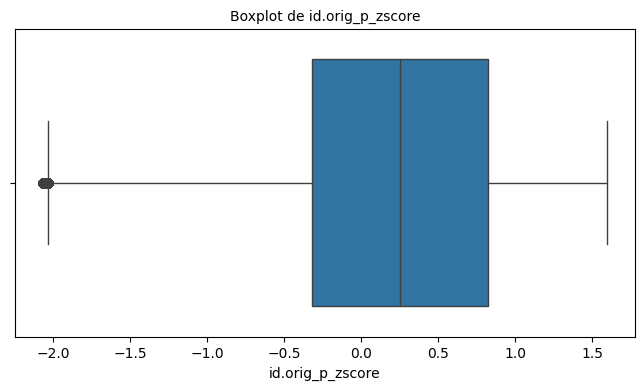

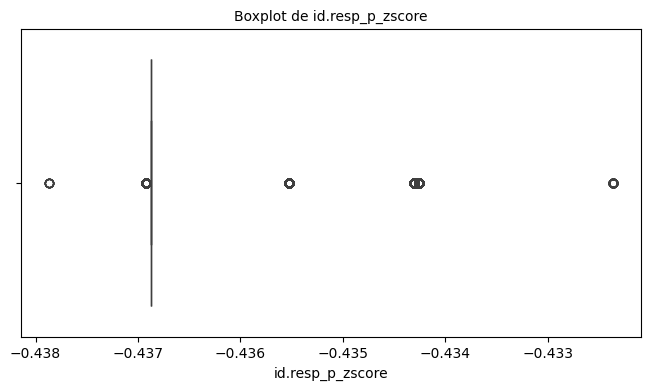

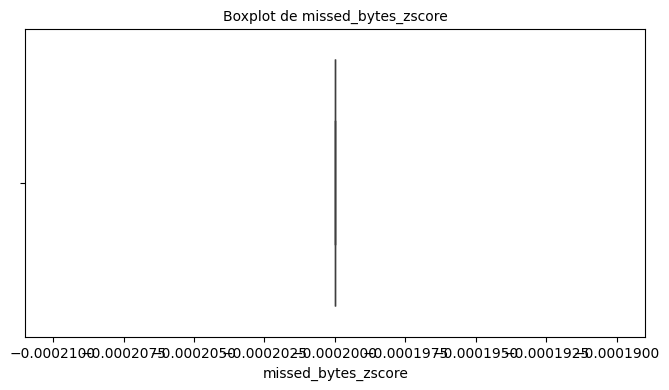

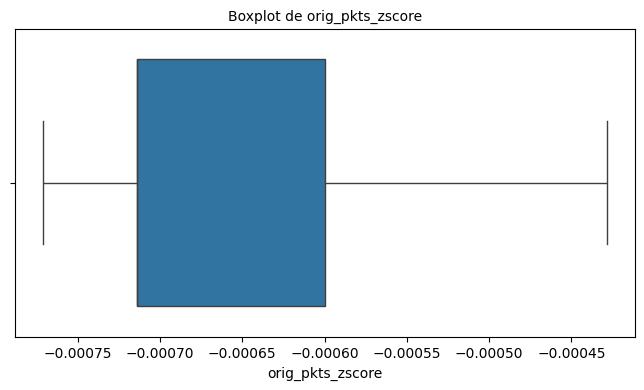

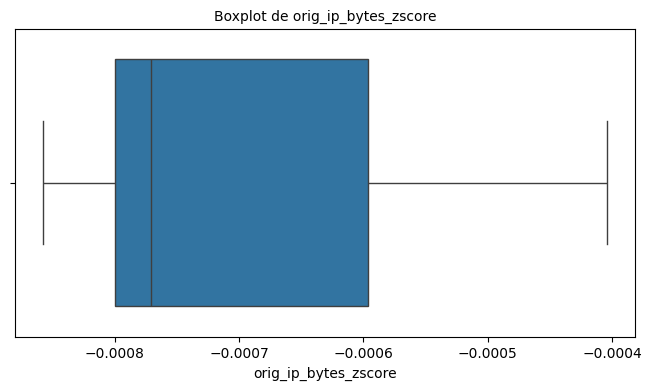

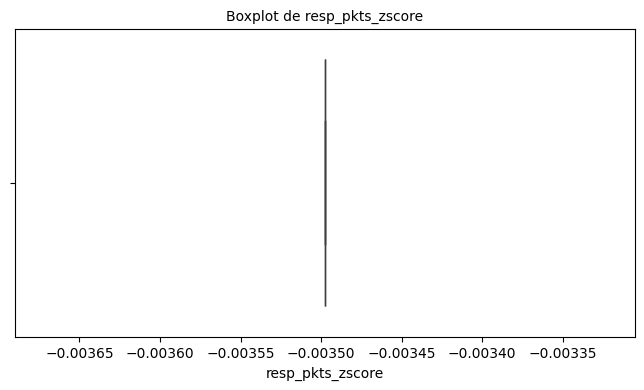

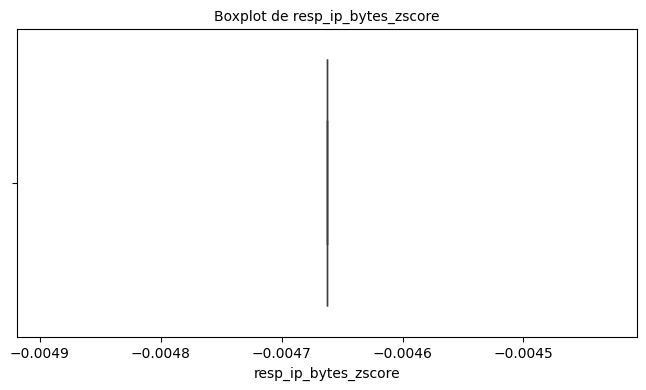

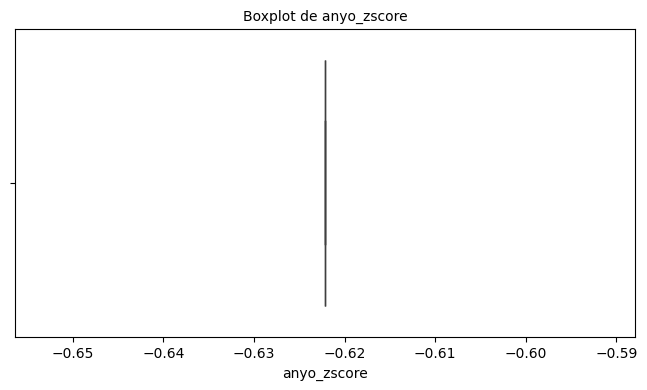

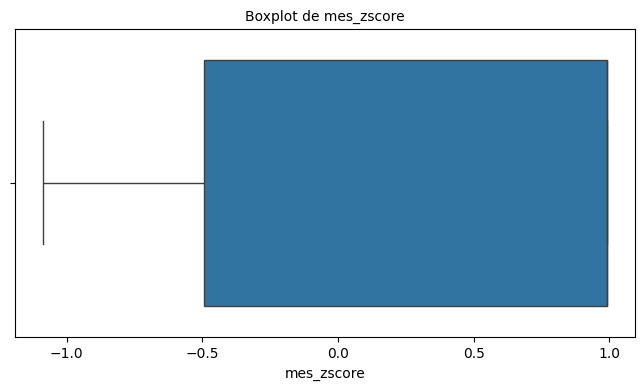

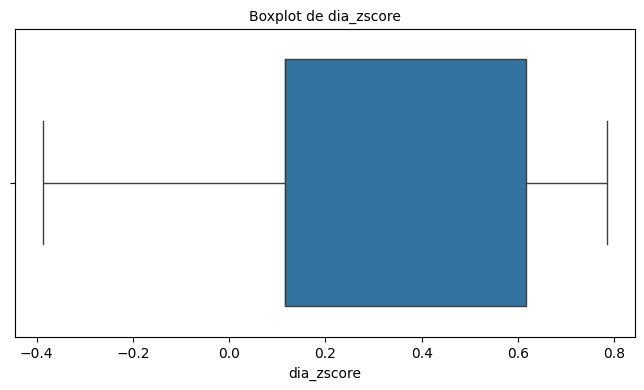

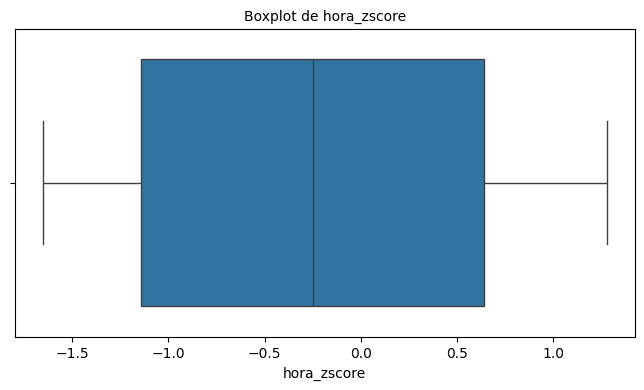

In [112]:
for col in df_ou.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_ou[col])
    plt.title('Boxplot de ' + col)
    plt.show()

In [80]:
bt.obtener_estadisticas(df)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
id.orig_p,0.26,float64,39909.62,No,16091.97,258951549.59,32980.0,42993.0,52360.0,numerica continua,0.0
id.resp_h,46.6,object,No,162.248.88.215,No,No,No,No,No,categorica ordinal,0.0
id.resp_p,0.26,float64,9710.51,No,22174.48,491707739.75,23.0,23.0,81.0,numerica continua,0.0
proto,0.0,object,No,tcp,No,No,No,No,No,categorica ordinal,0.0
conn_state,0.0,object,No,S0,No,No,No,No,No,categorica ordinal,0.0
missed_bytes,0.0,float64,76.33,No,381679.91,145679555881.059998,0.0,0.0,0.0,numerica continua,0.0
history,0.0,object,No,S,No,No,No,No,No,categorica ordinal,0.0
orig_pkts,0.0,float64,13.5,No,17511.7,306659531.76,1.0,1.0,3.0,numerica continua,0.0
orig_ip_bytes,0.01,float64,590.02,No,687810.32,473083036333.98999,40.0,60.0,180.0,numerica continua,0.0
resp_pkts,0.0,float64,0.01,No,4.19,17.55,0.0,0.0,0.0,numerica continua,0.0


In [40]:
bt.obtener_estadisticas(df_ou)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
id.orig_p,0.39,float64,41906.41,No,14163.7,200610330.88,34564.0,43808.0,53048.0,numerica continua,0.0
id.resp_h,58.67,object,No,209.97.190.136,No,No,No,No,No,categorica ordinal,0.0
proto,0.0,object,No,tcp,No,No,No,No,No,categorica nominal,0.0
conn_state,0.0,object,No,S0,No,No,No,No,No,categorica ordinal,0.0
history,0.0,object,No,S,No,No,No,No,No,categorica ordinal,0.0
orig_pkts,0.0,float64,1.66,No,0.98,0.95,1.0,1.0,3.0,numerica discreta,0.0
resp_pkts,0.0,float64,0.0,No,0.0,0.0,0.0,0.0,0.0,numerica discreta,0.0
anyo,0.0,int64,2018.0,No,0.0,0.0,2018.0,2018.0,2018.0,numerica discreta,0.0
hora,0.0,int64,11.3,No,7.2,51.81,4.0,11.0,18.0,numerica continua,0.0
Target,0.0,int64,0.54,No,0.5,0.25,0.0,1.0,1.0,numerica discreta,0.0


In [55]:
df_ou.columns

Index(['id.resp_h', 'proto', 'conn_state', 'history', 'orig_pkts', 'Target',
       'id.orig_p_zscore', 'orig_ip_bytes_zscore', 'resp_pkts_zscore',
       'anyo_zscore', 'hora_zscore', 'Target_zscore'],
      dtype='object')

ELIMINAMOS LAS COLUMNAS EQUIVALENTES A LAS YA ELIMINADAS DUPLICADAS AL HALLAR EL PZCORE

In [33]:
columns_correla_grafica_pz= [''id.orig_p', 'orig_pkts', 'anyo', 'hora', 'dia_zscore','mes_zscore', 
                             'resp_pkts', 'resp_ip_bytes_zscore', 'id.resp_p_zscore', 'missed_bytes_zscore',"orig_ip_bytes_zscore"]

In [34]:
df_ou.drop(columns_correla_grafica_pz, axis=1, inplace=True)

In [36]:
df_ou


,id.resp_h,proto,conn_state,history,Target,id.orig_p_zscore,orig_pkts_zscore,resp_pkts_zscore,anyo_zscore,hora_zscore
0,121.35.122.36,tcp,S0,S,Malicious,0.865300,-0.000600,-0.003498,-0.622184,0.769286
1,121.192.21.63,tcp,S0,S,Malicious,0.003317,-0.000600,-0.003498,-0.622184,0.769286
2,121.98.106.147,tcp,S0,S,Malicious,-0.142781,-0.000600,-0.003498,-0.622184,0.769286
3,121.100.68.26,tcp,S0,S,Malicious,0.708700,-0.000600,-0.003498,-0.622184,0.769286
4,121.181.114.215,tcp,S0,S,Malicious,0.908303,-0.000600,-0.003498,-0.622184,0.769286
...,...,...,...,...,...,...,...,...,...,...
15181635,216.146.135.210,tcp,S0,S,Benign,-0.370223,-0.000714,-0.003498,-0.622184,0.132242
15181636,240.170.159.234,tcp,S0,S,Benign,0.724733,-0.000714,-0.003498,-0.622184,0.132242
15181637,241.171.160.235,tcp,S0,S,Benign,-0.209025,-0.000714,-0.003498,-0.622184,0.132242
15181638,242.172.161.236,tcp,S0,S,Benign,0.354362,-0.000714,-0.003498,-0.622184,0.132242


In [37]:
df_ou.shape

(15181640, 10)

Columna: |	Descripción: |	Tipo: |	Orden de entrada: |	Información posterior a la etiqueta "label"|
-|-|-|-|-|
id.resp_h|	Identificador único del host de destino	|Categórico	 |1	 |No
proto|	Protocolo utilizado (TCP, UDP, ICMP, etc.)|	Categórico|	2|	No
conn_state|	Estado de la conexión (SYN, ACK, FIN, etc.)|	Categórico|	3	|No
history|	Historial de tráfico relacionado con esta conexión o sesión, pudiendo obtener patrones de actividad |	Categórico|	4	|No
id.orig_p|	Mes de la conexión|	Numérico|	5|	No
orig_pkts|	Número de paquetes enviados por el host de origen|	Numérico|	6|	No
resp_pkts|	Número de paquetes recibidos por el host de destino	|Numérico|	7|	No
anyo|	Año de la conexión|	Numérico|	8|	No
hora|	Hora de la conexión|	Numérico|	9|	No
Target|	Etiqueta que indica si la conexión es normal o anómala|	Categórica|10	| Target

In [90]:
df_ou.to_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_sin outlier_origen.csv", index=False)

In [37]:
df_out=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_sin outlier_origen.csv")

## MACHINE LEARNING Y  DEEP - LEARNING


In [39]:
df_ou

,id.resp_h,proto,conn_state,history,Target,id.orig_p_zscore,orig_pkts_zscore,resp_pkts_zscore,anyo_zscore,hora_zscore
0,121.35.122.36,tcp,S0,S,Malicious,0.865300,-0.000600,-0.003498,-0.622184,0.769286
1,121.192.21.63,tcp,S0,S,Malicious,0.003317,-0.000600,-0.003498,-0.622184,0.769286
2,121.98.106.147,tcp,S0,S,Malicious,-0.142781,-0.000600,-0.003498,-0.622184,0.769286
3,121.100.68.26,tcp,S0,S,Malicious,0.708700,-0.000600,-0.003498,-0.622184,0.769286
4,121.181.114.215,tcp,S0,S,Malicious,0.908303,-0.000600,-0.003498,-0.622184,0.769286
...,...,...,...,...,...,...,...,...,...,...
15181635,216.146.135.210,tcp,S0,S,Benign,-0.370223,-0.000714,-0.003498,-0.622184,0.132242
15181636,240.170.159.234,tcp,S0,S,Benign,0.724733,-0.000714,-0.003498,-0.622184,0.132242
15181637,241.171.160.235,tcp,S0,S,Benign,-0.209025,-0.000714,-0.003498,-0.622184,0.132242
15181638,242.172.161.236,tcp,S0,S,Benign,0.354362,-0.000714,-0.003498,-0.622184,0.132242


In [13]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15181640 entries, 0 to 15181639
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id.resp_h         object 
 1   proto             object 
 2   conn_state        object 
 3   history           object 
 4   Target            int64  
 5   id.orig_p_zscore  float64
 6   orig_pkts_zscore  float64
 7   resp_pkts_zscore  float64
 8   anyo_zscore       float64
 9   hora_zscore       float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.1+ GB


TECNICAS DE ESCALADOS 1

In [40]:
cat= ['proto','conn_state', "history", "id.resp_h"]
num=[  'id.orig_p_zscore',"orig_pkts",'resp_pkts_zscore', 'anyo_zscore', 'hora_zs_core']
Target="Target"


In [6]:
print(len(df_out["id.resp_h"].unique()))


8906580


In [7]:
print(len(df_out["history"].unique().sum()))

10


In [8]:
print(len(df_out["conn_state"].unique().sum()))

13


DEBIDO AL NUEMRO TAN ELEVADO DE VALORES UNCIOS DE LA VARIABLE ID.RESP_H, LA VOY A ESCALAR DIFERENTES A LOS OTRAS CATEGORICAS

- CATEGORICAS

ID.RESP_H: hashingEncoder

In [41]:
df_ou.shape

(15181640, 10)

In [42]:
encoder = ce.HashingEncoder(n_components=100)

# Ajustar y transformar la columna con muchos valores únicos
hashed = encoder.fit_transform(df_ou['id.resp_h'])

# Unir el DataFrame original con el DataFrame codificado
df_ou = df_ou.join(hashed.add_prefix('id_resp_h_hash_'))


In [48]:
df_ou.shape

(15181640, 116)

PROTO, CON_STATE E HISTORY- OneHot de Pandas, debido a que nuestra target es binaria, no intersa clasificaciones mayores

In [44]:
# Codificación one-hot a traves de pandas ( 2 columnas nuevas por cada valor unico de la columna)
df_ou = pd.get_dummies(df_ou, columns=['proto', 'conn_state', 'history'], drop_first=True)

In [47]:
df_ou

,Target,id.orig_p_zscore,orig_pkts_zscore,resp_pkts_zscore,anyo_zscore,hora_zscore,id_resp_h_hash_col_0,id_resp_h_hash_col_1,id_resp_h_hash_col_2,id_resp_h_hash_col_3,id_resp_h_hash_col_4,id_resp_h_hash_col_5,id_resp_h_hash_col_6,id_resp_h_hash_col_7,id_resp_h_hash_col_8,id_resp_h_hash_col_9,id_resp_h_hash_col_10,id_resp_h_hash_col_11,id_resp_h_hash_col_12,id_resp_h_hash_col_13,id_resp_h_hash_col_14,id_resp_h_hash_col_15,id_resp_h_hash_col_16,id_resp_h_hash_col_17,id_resp_h_hash_col_18,id_resp_h_hash_col_19,id_resp_h_hash_col_20,id_resp_h_hash_col_21,id_resp_h_hash_col_22,id_resp_h_hash_col_23,id_resp_h_hash_col_24,id_resp_h_hash_col_25,id_resp_h_hash_col_26,id_resp_h_hash_col_27,id_resp_h_hash_col_28,id_resp_h_hash_col_29,id_resp_h_hash_col_30,id_resp_h_hash_col_31,id_resp_h_hash_col_32,id_resp_h_hash_col_33,id_resp_h_hash_col_34,id_resp_h_hash_col_35,id_resp_h_hash_col_36,id_resp_h_hash_col_37,id_resp_h_hash_col_38,id_resp_h_hash_col_39,id_resp_h_hash_col_40,id_resp_h_hash_col_41,id_resp_h_hash_col_42,id_resp_h_hash_col_43,id_resp_h_hash_col_44,id_resp_h_hash_col_45,id_resp_h_hash_col_46,id_resp_h_hash_col_47,id_resp_h_hash_col_48,id_resp_h_hash_col_49,id_resp_h_hash_col_50,id_resp_h_hash_col_51,id_resp_h_hash_col_52,id_resp_h_hash_col_53,id_resp_h_hash_col_54,id_resp_h_hash_col_55,id_resp_h_hash_col_56,id_resp_h_hash_col_57,id_resp_h_hash_col_58,id_resp_h_hash_col_59,id_resp_h_hash_col_60,id_resp_h_hash_col_61,id_resp_h_hash_col_62,id_resp_h_hash_col_63,id_resp_h_hash_col_64,id_resp_h_hash_col_65,id_resp_h_hash_col_66,id_resp_h_hash_col_67,id_resp_h_hash_col_68,id_resp_h_hash_col_69,id_resp_h_hash_col_70,id_resp_h_hash_col_71,id_resp_h_hash_col_72,id_resp_h_hash_col_73,id_resp_h_hash_col_74,id_resp_h_hash_col_75,id_resp_h_hash_col_76,id_resp_h_hash_col_77,id_resp_h_hash_col_78,id_resp_h_hash_col_79,id_resp_h_hash_col_80,id_resp_h_hash_col_81,id_resp_h_hash_col_82,id_resp_h_hash_col_83,id_resp_h_hash_col_84,id_resp_h_hash_col_85,id_resp_h_hash_col_86,id_resp_h_hash_col_87,id_resp_h_hash_col_88,id_resp_h_hash_col_89,id_resp_h_hash_col_90,id_resp_h_hash_col_91,id_resp_h_hash_col_92,id_resp_h_hash_col_93,id_resp_h_hash_col_94,id_resp_h_hash_col_95,id_resp_h_hash_col_96,id_resp_h_hash_col_97,id_resp_h_hash_col_98,id_resp_h_hash_col_99,proto_udp,conn_state_RSTOS0,conn_state_S0,conn_state_SH,history_D,history_F,history_I,history_S,history_SAD,history_SI
0,Malicious,0.865300,-0.000600,-0.003498,-0.622184,0.769286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,Malicious,0.003317,-0.000600,-0.003498,-0.622184,0.769286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,Malicious,-0.142781,-0.000600,-0.003498,-0.622184,0.769286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,Malicious,0.708700,-0.000600,-0.003498,-0.622184,0.769286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,Malicious,0.908303,-0.000600,-0.003498,-0.622184,0.769286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [46]:
#eliminamos las columnas originales
df_ou.drop(['id.resp_h'], axis=1, inplace=True)

In [46]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15181640 entries, 0 to 15181639
Columns: 116 entries, Target to history_SI
dtypes: float64(5), int64(101), uint8(10)
memory usage: 12.1 GB


- NUMERICAS

YA FUERON ESTANDARIZADAS DURANTE LA BUSQUEDA DE OUTLIERS

In [49]:
df_ou.to_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_codificado_origen.csv", index=False)

In [5]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_codificado_origen.csv")

In [6]:
df

,Target,id.orig_p_zscore,orig_pkts_zscore,resp_pkts_zscore,anyo_zscore,hora_zscore,id_resp_h_hash_col_0,id_resp_h_hash_col_1,id_resp_h_hash_col_2,id_resp_h_hash_col_3,id_resp_h_hash_col_4,id_resp_h_hash_col_5,id_resp_h_hash_col_6,id_resp_h_hash_col_7,id_resp_h_hash_col_8,id_resp_h_hash_col_9,id_resp_h_hash_col_10,id_resp_h_hash_col_11,id_resp_h_hash_col_12,id_resp_h_hash_col_13,id_resp_h_hash_col_14,id_resp_h_hash_col_15,id_resp_h_hash_col_16,id_resp_h_hash_col_17,id_resp_h_hash_col_18,id_resp_h_hash_col_19,id_resp_h_hash_col_20,id_resp_h_hash_col_21,id_resp_h_hash_col_22,id_resp_h_hash_col_23,id_resp_h_hash_col_24,id_resp_h_hash_col_25,id_resp_h_hash_col_26,id_resp_h_hash_col_27,id_resp_h_hash_col_28,id_resp_h_hash_col_29,id_resp_h_hash_col_30,id_resp_h_hash_col_31,id_resp_h_hash_col_32,id_resp_h_hash_col_33,id_resp_h_hash_col_34,id_resp_h_hash_col_35,id_resp_h_hash_col_36,id_resp_h_hash_col_37,id_resp_h_hash_col_38,id_resp_h_hash_col_39,id_resp_h_hash_col_40,id_resp_h_hash_col_41,id_resp_h_hash_col_42,id_resp_h_hash_col_43,id_resp_h_hash_col_44,id_resp_h_hash_col_45,id_resp_h_hash_col_46,id_resp_h_hash_col_47,id_resp_h_hash_col_48,id_resp_h_hash_col_49,id_resp_h_hash_col_50,id_resp_h_hash_col_51,id_resp_h_hash_col_52,id_resp_h_hash_col_53,id_resp_h_hash_col_54,id_resp_h_hash_col_55,id_resp_h_hash_col_56,id_resp_h_hash_col_57,id_resp_h_hash_col_58,id_resp_h_hash_col_59,id_resp_h_hash_col_60,id_resp_h_hash_col_61,id_resp_h_hash_col_62,id_resp_h_hash_col_63,id_resp_h_hash_col_64,id_resp_h_hash_col_65,id_resp_h_hash_col_66,id_resp_h_hash_col_67,id_resp_h_hash_col_68,id_resp_h_hash_col_69,id_resp_h_hash_col_70,id_resp_h_hash_col_71,id_resp_h_hash_col_72,id_resp_h_hash_col_73,id_resp_h_hash_col_74,id_resp_h_hash_col_75,id_resp_h_hash_col_76,id_resp_h_hash_col_77,id_resp_h_hash_col_78,id_resp_h_hash_col_79,id_resp_h_hash_col_80,id_resp_h_hash_col_81,id_resp_h_hash_col_82,id_resp_h_hash_col_83,id_resp_h_hash_col_84,id_resp_h_hash_col_85,id_resp_h_hash_col_86,id_resp_h_hash_col_87,id_resp_h_hash_col_88,id_resp_h_hash_col_89,id_resp_h_hash_col_90,id_resp_h_hash_col_91,id_resp_h_hash_col_92,id_resp_h_hash_col_93,id_resp_h_hash_col_94,id_resp_h_hash_col_95,id_resp_h_hash_col_96,id_resp_h_hash_col_97,id_resp_h_hash_col_98,id_resp_h_hash_col_99,proto_udp,conn_state_RSTOS0,conn_state_S0,conn_state_SH,history_D,history_F,history_I,history_S,history_SAD,history_SI
0,Malicious,0.865300,-0.000600,-0.003498,-0.622184,0.769286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,Malicious,0.003317,-0.000600,-0.003498,-0.622184,0.769286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,Malicious,-0.142781,-0.000600,-0.003498,-0.622184,0.769286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,Malicious,0.708700,-0.000600,-0.003498,-0.622184,0.769286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,Malicious,0.908303,-0.000600,-0.003498,-0.622184,0.769286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [16]:
df.columns

Index(['Target', 'id.orig_p_zscore', 'orig_pkts_zscore', 'resp_pkts_zscore',
       'anyo_zscore', 'hora_zscore', 'id_resp_h_hash_col_0',
       'id_resp_h_hash_col_1', 'id_resp_h_hash_col_2', 'id_resp_h_hash_col_3',
       ...
       'proto_udp', 'conn_state_RSTOS0', 'conn_state_S0', 'conn_state_SH',
       'history_D', 'history_F', 'history_I', 'history_S', 'history_SAD',
       'history_SI'],
      dtype='object', length=116)

In [7]:
df["Target"] = df["Target"].apply(lambda x: 0 if x == "Malicious" else 1)

In [8]:
df.head(1)

,Target,id.orig_p_zscore,orig_pkts_zscore,resp_pkts_zscore,anyo_zscore,hora_zscore,id_resp_h_hash_col_0,id_resp_h_hash_col_1,id_resp_h_hash_col_2,id_resp_h_hash_col_3,id_resp_h_hash_col_4,id_resp_h_hash_col_5,id_resp_h_hash_col_6,id_resp_h_hash_col_7,id_resp_h_hash_col_8,id_resp_h_hash_col_9,id_resp_h_hash_col_10,id_resp_h_hash_col_11,id_resp_h_hash_col_12,id_resp_h_hash_col_13,id_resp_h_hash_col_14,id_resp_h_hash_col_15,id_resp_h_hash_col_16,id_resp_h_hash_col_17,id_resp_h_hash_col_18,id_resp_h_hash_col_19,id_resp_h_hash_col_20,id_resp_h_hash_col_21,id_resp_h_hash_col_22,id_resp_h_hash_col_23,id_resp_h_hash_col_24,id_resp_h_hash_col_25,id_resp_h_hash_col_26,id_resp_h_hash_col_27,id_resp_h_hash_col_28,id_resp_h_hash_col_29,id_resp_h_hash_col_30,id_resp_h_hash_col_31,id_resp_h_hash_col_32,id_resp_h_hash_col_33,id_resp_h_hash_col_34,id_resp_h_hash_col_35,id_resp_h_hash_col_36,id_resp_h_hash_col_37,id_resp_h_hash_col_38,id_resp_h_hash_col_39,id_resp_h_hash_col_40,id_resp_h_hash_col_41,id_resp_h_hash_col_42,id_resp_h_hash_col_43,id_resp_h_hash_col_44,id_resp_h_hash_col_45,id_resp_h_hash_col_46,id_resp_h_hash_col_47,id_resp_h_hash_col_48,id_resp_h_hash_col_49,id_resp_h_hash_col_50,id_resp_h_hash_col_51,id_resp_h_hash_col_52,id_resp_h_hash_col_53,id_resp_h_hash_col_54,id_resp_h_hash_col_55,id_resp_h_hash_col_56,id_resp_h_hash_col_57,id_resp_h_hash_col_58,id_resp_h_hash_col_59,id_resp_h_hash_col_60,id_resp_h_hash_col_61,id_resp_h_hash_col_62,id_resp_h_hash_col_63,id_resp_h_hash_col_64,id_resp_h_hash_col_65,id_resp_h_hash_col_66,id_resp_h_hash_col_67,id_resp_h_hash_col_68,id_resp_h_hash_col_69,id_resp_h_hash_col_70,id_resp_h_hash_col_71,id_resp_h_hash_col_72,id_resp_h_hash_col_73,id_resp_h_hash_col_74,id_resp_h_hash_col_75,id_resp_h_hash_col_76,id_resp_h_hash_col_77,id_resp_h_hash_col_78,id_resp_h_hash_col_79,id_resp_h_hash_col_80,id_resp_h_hash_col_81,id_resp_h_hash_col_82,id_resp_h_hash_col_83,id_resp_h_hash_col_84,id_resp_h_hash_col_85,id_resp_h_hash_col_86,id_resp_h_hash_col_87,id_resp_h_hash_col_88,id_resp_h_hash_col_89,id_resp_h_hash_col_90,id_resp_h_hash_col_91,id_resp_h_hash_col_92,id_resp_h_hash_col_93,id_resp_h_hash_col_94,id_resp_h_hash_col_95,id_resp_h_hash_col_96,id_resp_h_hash_col_97,id_resp_h_hash_col_98,id_resp_h_hash_col_99,proto_udp,conn_state_RSTOS0,conn_state_S0,conn_state_SH,history_D,history_F,history_I,history_S,history_SAD,history_SI
0,0,0.8653,-0.0006,-0.003498,-0.622184,0.769286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [25]:
df.shape

(15181640, 116)

1.-APLICAMOS RANDOMFOREST Y LOGISTIC REGRESION DESBALANCEADA

In [9]:
X=df.drop(["Target"], axis=1)
y=df["Target"]

APLICAMOS SET TRAIN, VALIDACION Y TEST

In [10]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [30]:
# Definir el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)


# Entrenar el modelo
with parallel_backend('threading'):
    model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74    808056
           1       1.00      0.74      0.85   2228272

    accuracy                           0.81   3036328
   macro avg       0.79      0.87      0.79   3036328
weighted avg       0.89      0.81      0.82   3036328



EN ESTE RESULTADO ES INTERSANTE QUE LA PRECISION EN BENIGNO ES 100% SIN EMBARGO LA CANTIDAD DE POSOTIVOS REALES QUE ACIERTA ESTA EN 74; Y EN LA CLASE MALICIOUS PASA AL CONTRARIO, ES DECIR,  UNA PRECISION BAJA DEL 58 % PERO UN 100% DE ACIERTOS EN LOS POSITVOS CORRECTOS,ES DECIR QUE LAS PREDICCIONES POSITIVIAS SON RELAMENTE CORRECTAS PARA LAS CLASE 1 , PERO ACERTANDO CORRECTAMENTE LAS INSTACIAS EN UN 74%.
PERO PARA EL PROBLEMA DE NEGOCIO PLANTEADO, EN LA CLASE MALICIOUS ACIERTA EN UN 100% EN SU SELECCION PERO CON UNA PRECISCION DEL 58% , SIENDO REALEMNETE INTERESANTE PARA NUESTRO PROBLEMA, Y ADEMAS CON UNA PROPORCIÓN DE PERDICCIONES CORRECTAS TOTALES DEL 81%(ACCURACY).<BR>
EN DEFINITVA, UN MODELO A TENER EN CUENTA PARA ANALIZAR CON EL TIPO TEST.


In [ ]:
importancia=model.feature_importances_

In [32]:
importancia.shape

(115,)

In [34]:
df_importancia=pd.DataFrame(importancia, index=X.columns, columns=["Importancia"])

<AxesSubplot:>

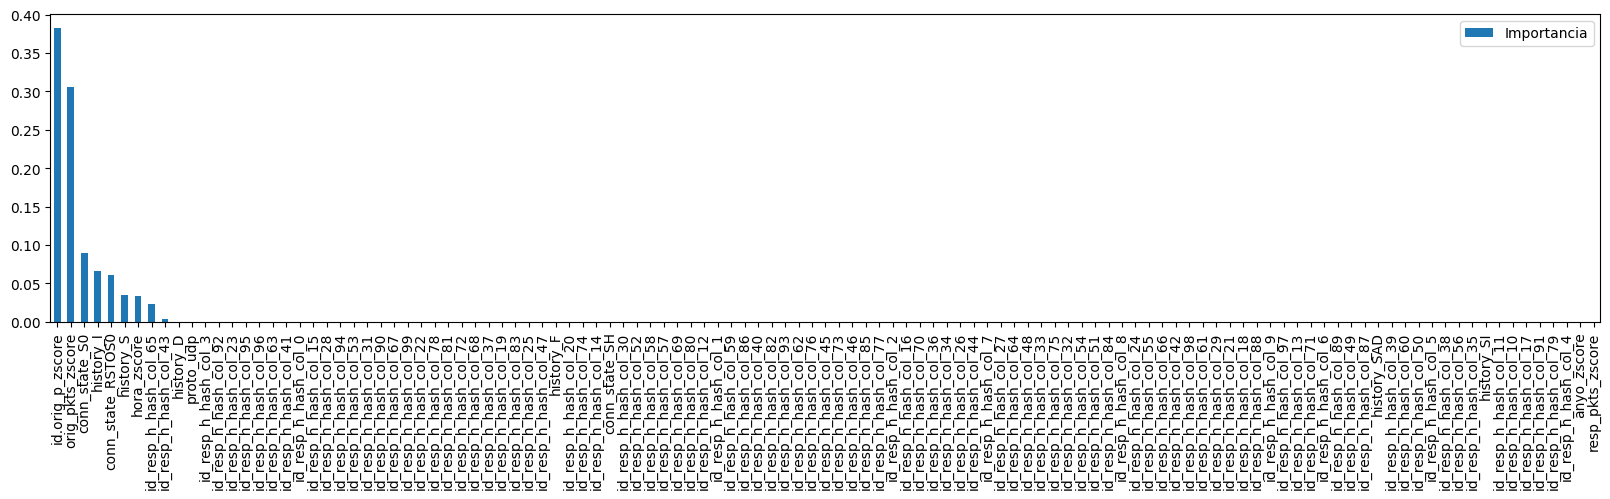

In [35]:
df_importancia.sort_values(by="Importancia", ascending=False).plot(kind="bar", figsize=(20, 4))

## MODELO GANADOR AL QUE SE LE PASA EL TEST DE PRUEBA

In [11]:
# Definir el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)


# Entrenar el modelo
with parallel_backend('threading'):
    model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74    808574
           1       1.00      0.74      0.85   2227754

    accuracy                           0.81   3036328
   macro avg       0.79      0.87      0.79   3036328
weighted avg       0.89      0.81      0.82   3036328



In [125]:
df_out.to_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_aun_ML_origen.csv", index=False)

In [3]:
df_out=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_aun_ML_origen.csv")

LOGISTIC-REGRESSION

In [4]:
X=df_out.drop(["Target"], axis=1)
y=df_out["Target"]

In [38]:
# Convertir los datos a float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [39]:
# Definir el modelo logisctic con C para regule el sobreajutes y la funcion sag q es adecuado con muchos datos
model = LogisticRegression(C=10, solver="sag")

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

         0.0       0.57      0.70      0.62   1124927
         1.0       0.79      0.69      0.73   1911401

    accuracy                           0.69   3036328
   macro avg       0.68      0.69      0.68   3036328
weighted avg       0.71      0.69      0.69   3036328



EN ESTE MODELO OBSERVAMOS QUE TANTO PARA LA CLASE 1 Y 0 BAJA TANTO LA PRECISION COMO EL RECALL MAS BAJA QUE EL MODELO ANTERIOR, ASI QUE DESCARTADO

In [6]:
df_out=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_aun_ML_origen.csv")

In [7]:
df_out.shape

(15181640, 116)

### SUBMUESTREO DE LA CLASE MALICIOUS QUE ES LA MAYORITARIA PARA CONSEGUIR UN BALANCEO.- SE BALANCEA EL DATASET COMPLETO, DEJANDO LA TRAGET 50/50, PERO PERDIENDO UN 30% DE LOS DATOS

In [8]:
# Aplica submuestro, para reducir el número de observaciones de todas las clases menos la clase minoritaria
X=df_out.drop(["Target"], axis=1)
y=df_out["Target"]

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [9]:
X_temp, X_test, y_temp, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

<AxesSubplot:xlabel='Target', ylabel='Count'>

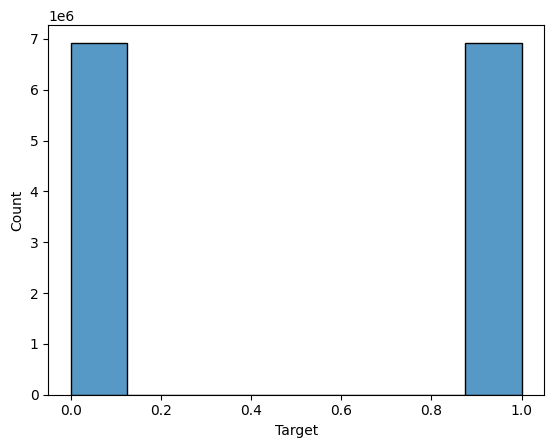

In [10]:
sns.histplot(y_resampled, bins=8)

In [11]:
X_resampled.shape

(13847574, 115)

In [12]:
# Convertir los datos a float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
x_test = X_test.astype("float32")
y_test = y_test.astype("float32")
X_val = X_val.astype("float32")
y_val = y_val.astype("float32")

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(8308544, 115)
(2769515, 115)
(8308544,)
(2769515,)
(2769515, 115)
(2769515,)


MODELO LOGISTICREGRESSION RESAMPLING

In [14]:
# Definir el modelo
model = LogisticRegression(solver='sag', max_iter=100, n_jobs=-1)

# Entrenar el modelo
with parallel_backend('threading'):
    model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_val)

# Evaluar el modelo
print(classification_report(y_val, y_pred))

c:\Users\victo\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.73      0.62      0.67   1385714
         1.0       0.67      0.77      0.72   1383801

    accuracy                           0.69   2769515
   macro avg       0.70      0.69      0.69   2769515
weighted avg       0.70      0.69      0.69   2769515



EN ESTE CASO CON EL LOGISTICREGRESSION OBSERVAMOS UN MODELO MUY DCERCARNO AL 70% EN AMBAS CLASES PARA PRECISION Y RECALL Y UN ACCURACY DEL 69%, NO ES UN MAL MODELO PERO NOS QUEDAMOS CON EL ANTERIOR NONMBRADO POR TEMA DE NEGOCIO

In [15]:
roc_auc_score(y_val, y_pred)

0.6945865480915098

EL VALOR AUC ES DE UN CASI 70% POR LO QUE EL MODELO TIENE ALTA CAPACIDAD DE DISTINGUIR AMBAS CLASES

### MODELO RANDOMFOREST CON LOS MEJORES CON RESAMPLING

In [16]:
# Definir el modelo
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Entrenar el modelo
# Usar parallel_backend para aprovechar la multiprocesamiento
with parallel_backend('threading'):
    model_rf.fit(X_train, y_train)

# Predecir
y_pred = model_rf.predict(X_val)

# Evaluar el modelo
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.60      0.75   1385714
         1.0       0.71      0.99      0.83   1383801

    accuracy                           0.80   2769515
   macro avg       0.85      0.80      0.79   2769515
weighted avg       0.85      0.80      0.79   2769515



ESTE MODELO TIENE UNOS RESULTADOS MUY SIMILARES AL RANDOFOREST DESBALANCEADO, CON UNA PRECISION UN 0.02% MENOR AL MODELO DESBALANCEADO (100%) Y UN RECALL 0.02% MAYOR (58% EL ANTERIOR). eN RELACION A LA CLASE 1 MUY SIMILAR, Y UN ACCURACY DEL 80%, OTRO MODELO A TENER EN CUENTA

In [35]:
roc_auc_score(y_val, y_pred)

0.6946707455570249

EL VALOR AUC ES DE UN CASI 70% POR LO QUE EL MODELO TIENE ALTA CAPACIDAD DE DISTINGUIR AMBAS CLASES

In [38]:
df_out.to_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_fin_ML_origen.csv", index=False)   

In [17]:
df_out.shape

(15181640, 116)

CONTINUA LA RED NEURONAL EN EL NOTEBOOK 1.3